In [1]:
import matplotlib.pyplot as plt

**!!! данные взяты из output-а MaxMinMatrixValue.cpp**

In [2]:
thread_count = [2, 4, 8, 16]
element_count = [4, 100, 1000, 10000]

In [3]:
critical_data ={2:[0,0,0.003,0.279],4:[0,0,0.002,0.134],8:[0.001,0,0.001,0.116],16:[0,0,0.002,0.095]}
reduction_data ={2:[0,0.001,0.008,0.306],4:[0.001,0,0.002,0.173],8:[0,0,0.004,0.13],16:[0.003,0.002,0.002,0.129]}
consistent_data ={2:[0,0,0.005,0.503],4:[0,0,0.004,0.468],8:[0,0,0.005,0.457],16:[0,0,0.004,0.415]}

***Визуализация времени работы программы к размерности программы:***

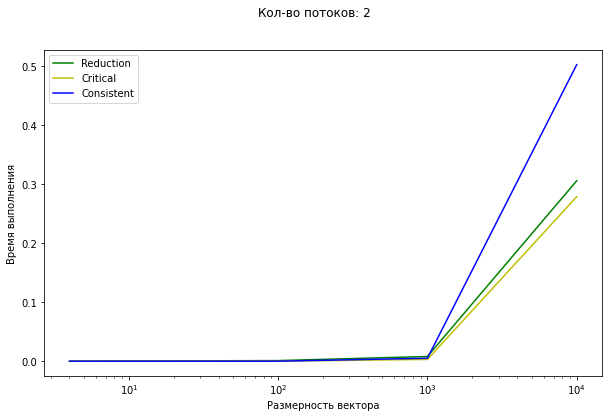

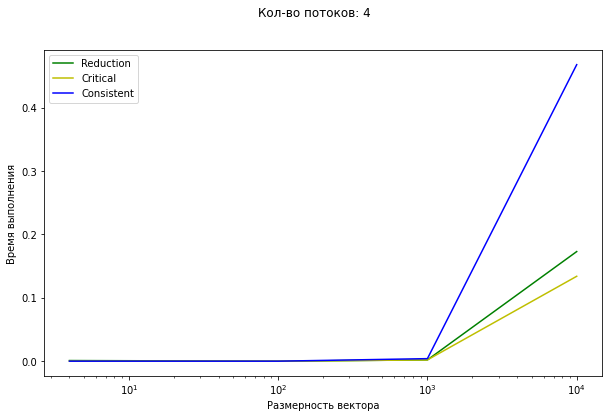

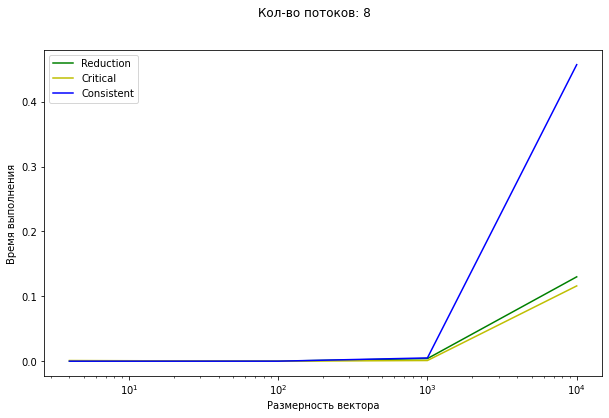

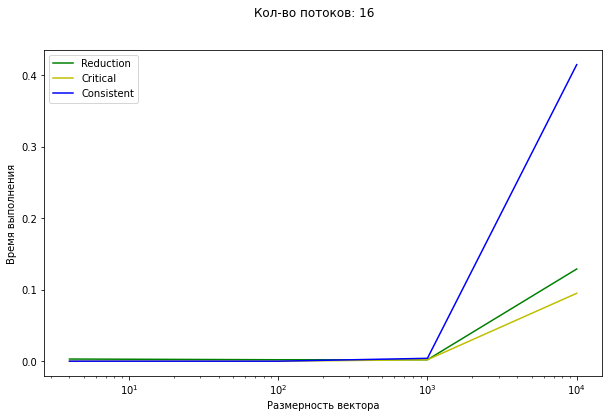

In [4]:
for i in range (len(element_count)):
    fig, ax1 = plt.subplots(ncols=1, figsize=(10, 6))
    ax1.set_xlabel('Размерность вектора')
    ax1.set_ylabel('Время выполнения')
    
    fig.suptitle('Кол-во потоков: %i' %(thread_count[i]))
    
    ax1.plot(element_count, reduction_data[thread_count[i]], label = "Reduction", color='g')
    ax1.plot(element_count, critical_data[thread_count[i]], label = "Critical", color='y')
    ax1.plot(element_count, consistent_data[thread_count[i]], label = "Consistent", color='b')

    ax1.legend()
    plt.xscale('log')
    plt.yscale('linear')

В данной задаче критическая секция показала лучшие результаты в сравнении с редьюсом.


Однако при сравнительно небольших объемах (при размерности < 10^3) - не важно, что использовать, как показывает статистика.

***Визуализация времени работы программы к кол-ву потоков:***

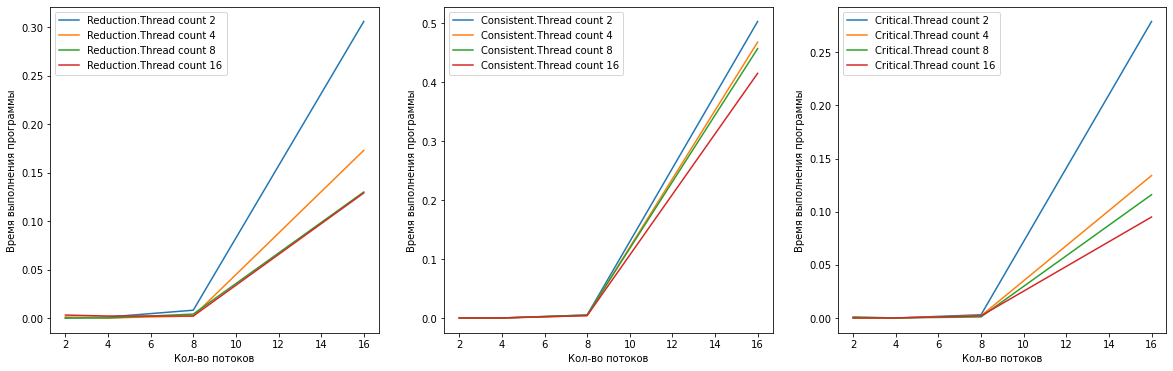

In [5]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20, 6))
ax1.set_xlabel('Кол-во потоков')
ax1.set_ylabel('Время выполнения программы')
ax2.set_xlabel('Кол-во потоков')
ax2.set_ylabel('Время выполнения программы')
ax3.set_xlabel('Кол-во потоков')
ax3.set_ylabel('Время выполнения программы')

for i in range(len(reduction_data)):
    ax1.plot(thread_count, reduction_data[thread_count[i]], label = 'Reduction.Thread count ' + str(thread_count[i]))
    ax2.plot(thread_count, consistent_data[thread_count[i]], label = 'Consistent.Thread count ' + str(thread_count[i]))
    ax3.plot(thread_count, critical_data[thread_count[i]], label = 'Critical.Thread count ' + str(thread_count[i]))


    
ax1.legend()
ax2.legend()
ax3.legend()

Здесь мы можем видеть, как кол-во потоков влияет на обработку данных. Reduce и критические блоки с увелечением кол-ва потоков стремительно уменьшает время выполнения программы. Особенно, в случае мигрорования с однопоточного приложения.

Однако, с определенного момента, кол-во потоков перестаев влиять на время исполнения в случае Reduce, однако в тоже самое время все еще дает прирост в критической секции

**Визуализация ускорения работы программы:**

In [6]:
speed_up_reduce = {k: [ b / m if m else 1 for b, m in zip(consistent_data[k], reduction_data[k])] for k in consistent_data if k in reduction_data}
speed_up_critical = {k: [ b / m if m else 1 for b, m in zip(consistent_data[k], critical_data[k])] for k in consistent_data if k in critical_data}
speed_up_const = {k: [ b / m if m else 1 for b, m in zip(consistent_data[k], consistent_data[k])] for k in consistent_data if k in consistent_data}

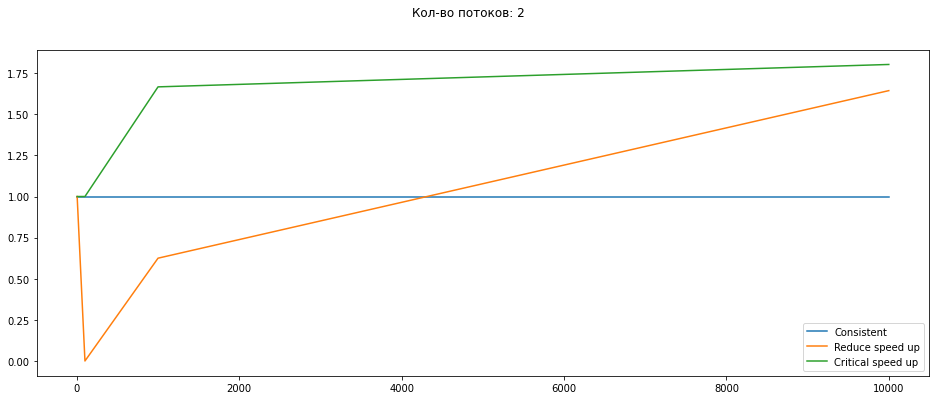

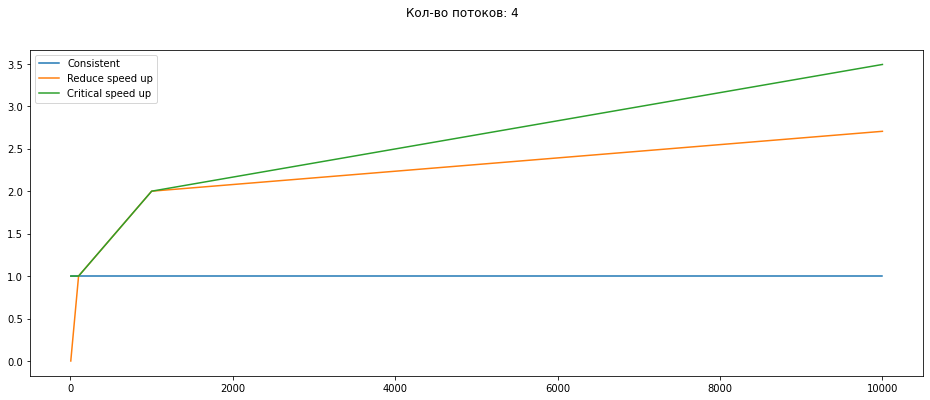

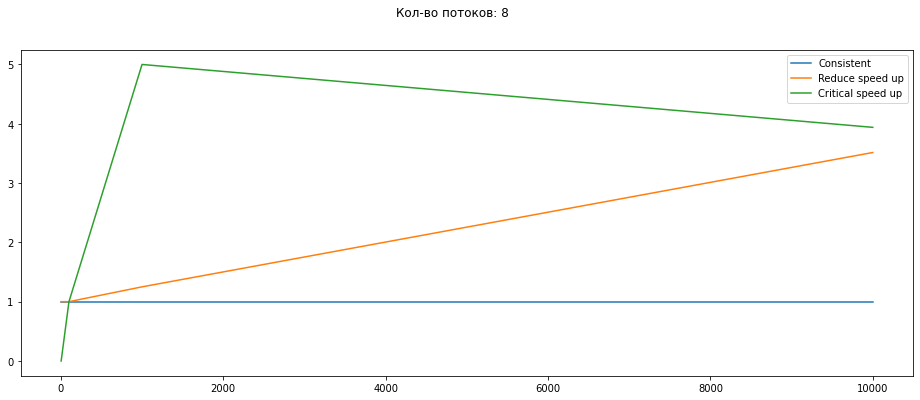

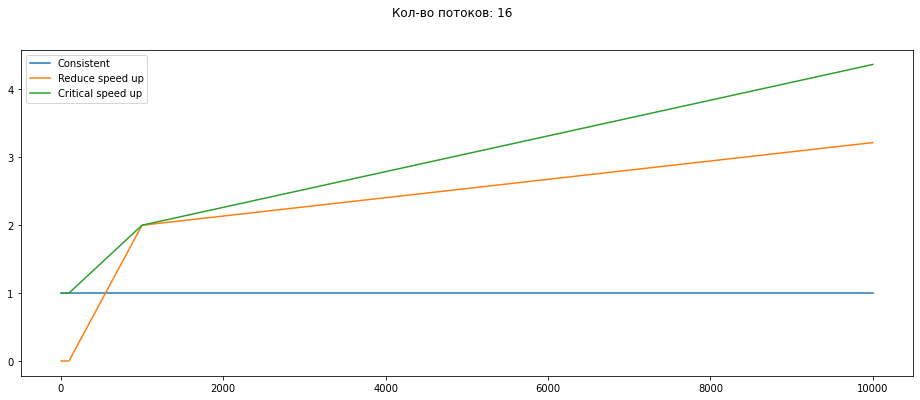

In [7]:
for i in range (len(element_count)):
    fig, ax1 = plt.subplots(ncols=1, figsize=(16, 6))
    fig.suptitle('Кол-во потоков: %i' %(thread_count[i]))
    
    ax1.plot(element_count, speed_up_const[thread_count[i]], label = "Consistent")
    ax1.plot(element_count, speed_up_reduce[thread_count[i]], label = "Reduce speed up")
    ax1.plot(element_count, speed_up_critical[thread_count[i]], label = "Critical speed up")
    
    ax1.legend()